## Python install (Anaconda) : https://www.anaconda.com/products/individual
## (You can lauch "JupyterLab" or "Notebook")
## Python Implement (Machine Learning) : https://mlcourse.ai/ 

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Reading the dataset
wine_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine_attributes = ['Class','Alcohol','Malic acid','Ash length','Alcalinity of ash', 'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280','Proline']
# first attribute is the class identifier (1-3)
wine_df = pd.read_csv(wine_URL, names = wine_attributes)
# Rearrange dataframe and switching target to the end of list
cols = wine_df.columns.tolist() 
wine_df = wine_df[cols[1:]+cols[:1]]

In [4]:
wine_df

,Alcohol,Malic acid,Ash length,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [5]:
# Separating the training set and test set

from sklearn.model_selection import train_test_split

X = wine_df.drop('Class',axis=1)
y = wine_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [6]:
X.shape

(178, 13)

In [7]:
X_train.shape

(124, 13)

In [8]:
y_train.shape

(124,)

In [9]:
# importing Decision Tree Classifier via sklean

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

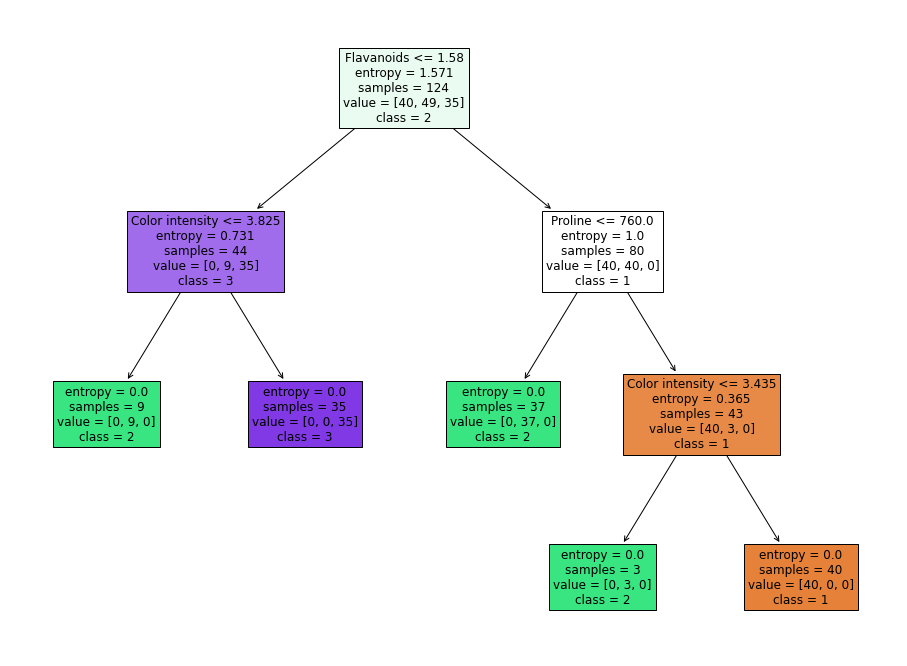

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=wine_df.columns, fontsize=12, filled=True, 
              class_names=['1', '2','3'])

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_test,predictions,digits = 2))

              precision    recall  f1-score   support

           1       1.00      0.84      0.91        19
           2       0.88      0.95      0.91        22
           3       0.93      1.00      0.96        13

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



macro avg = (1+0.88+0.93)/3 = 0.93 ... ...

weighted avg = (1*19 + 0.88*22 + 0.93*13) / 54 = 0.93 ... ...